<a href="https://colab.research.google.com/github/hughjafro/DS-Sprint-5-Project-Week/blob/master/DS_151_Sprint_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Readme:

####1. What is my hypothesis: That the team with a higher Elo should win more than 50% of the time

**Background:**
* NBA founded in 1946 as Basketball Association of America. Merged with National Basketball League and renamed NB Ain 1949.
* Four (4) ABA teams added to NBA in 1977 
* Modern era is considered 1998 to present - post-Jordan Bulls dominance.
* [Timeline of NBA Teams](https://en.wikipedia.org/wiki/Timeline_of_the_National_Basketball_Association)

####2. Add data from fivethirthyeight regarding Elo and CARM-ELO


####3. Explore Parse/Clean Data
  * Determine what data is necessary and which is auxiliary
  * Clean data - deal with empty cells
  * 

####4. Define essential data, Group data
* Group by year, first, to analyze data by year, Then expand to multiple years
  * Group by team to determine
* Group by home team (team 1) / Away team (team 2)

####5. Data Viz
* Probably Seaborn, Plotly, Bokeh
* Utilize line charts
  * with colored area under the cover
* Extend to Bokeh
  * bar_pandas_groupby_nested
  * ridgeplot
  * **range_tool!!!!**

####6. Build further models/algorithms
* Stretch Goals
    * Add hypothesis testing
    * .rolling - Rolling Average ([Stack Overflow](https://stackoverflow.com/questions/49684734/dataframe-moving-average-with-rolling-mean-and-shift-while-ignoring-nan))

####7. Feedback loop / Iterate


####Notes:
Explanation of Elo rating from [FiveThirtyEight](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/)
[CARM-ELO](https://projects.fivethirtyeight.com/carmelo/) (**C**areer-**a**rc **R**egression **M**odel **E**stimator with **L**ocal **O**ptimization ) explanation

Special data that introduces specific stats. May later explain jumps/spikes in data results:

*Seperated by years the new stat was introduced and tracked*

| Pre-1971        | 1973-74           | 1977-80  |
| ------------- |:-------------:| -----:|
| Rebounds: 1950-51      | Steals: 1973-74 | Turnovers: 1977-78 |
| Minutes: 1951-52      | Blocks: 1973-74     | 3-pt: 1979-80     
| Started: 1970-71 | Off Rebounds: 1973-74     |     |
|  | Def Rebounds: 1973-74      |     |

*[Neutral site game](https://https://www.nba.com/global/games2013/all-time-international-game-list.html)* - There are a total of 30 neutral site games

*[NBA stats FAQ](https://https://stats.nba.com/help/faq/)*

*Total games from 11/1/1946 to 6/8/18* - 67094 (includes playoffs)



###1. Hypothesis

####2. Add data from fivethirthyeight regarding Elo and CARM-ELO

In [0]:
# import all modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#!pip install --upgrade seaborn

In [0]:
#import seaborn seperately just in case version control issues occur
import seaborn as sns

In [6]:
sns.__version__

'0.9.0'

In [10]:
# Data source: FiveThirthyEight
url = 'https://projects.fivethirtyeight.com/nba-model/nba_elo.csv'

# Import dataset from assigned url
nba_data = pd.read_csv(url)

#Convert date column to datetime format
nba_data['date'] = pd.to_datetime(nba_data['date']) 

# Look at the rows/columns and general statistical data
print(nba_data.shape)

nba_data.describe()

(68324, 24)


,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo1_post,carm-elo2_post,carm-elo_prob1,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2
count,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,67513.000000,67513.000000,5167.000000,5167.000000,4356.000000,4356.000000,5167.000000,5167.000000,1230.000000,1230.000000,1230.000000,1230.000000,67513.000000,67513.000000
mean,1990.414291,0.000439,1496.288016,1496.531512,0.621179,0.378821,1496.136852,1496.476494,1512.575773,1510.894765,1512.382461,1512.510714,0.626522,0.373478,1515.466160,1515.333991,0.620808,0.379192,104.736984,101.052360
std,18.594788,0.020950,112.324567,111.759812,0.178141,0.178141,112.904855,112.062393,117.272056,116.854678,119.046575,118.107722,0.191837,0.191837,117.445424,117.261087,0.200485,0.200485,14.833883,14.283531
min,1947.000000,0.000000,1105.617800,1091.644500,0.062616,0.018315,1100.291900,1085.774400,1187.730784,1192.842155,1187.730784,1192.004524,0.060474,0.013407,1281.328778,1276.551561,0.120228,0.038478,2.000000,0.000000
25%,1976.000000,0.000000,1418.910550,1419.052850,0.498848,0.240510,1417.841700,1418.807900,1438.930652,1438.193630,1434.249496,1435.686432,0.494466,0.219772,1437.271517,1437.271517,0.467834,0.210584,95.000000,92.000000
50%,1992.000000,0.000000,1501.683749,1502.847900,0.640018,0.359982,1501.540900,1502.436000,1510.130092,1510.017503,1510.308068,1512.149768,0.652341,0.347659,1519.041607,1519.041607,0.646761,0.353239,105.000000,101.000000
75%,2006.000000,0.000000,1576.590325,1576.036450,0.759490,0.501152,1576.694200,1576.254200,1587.273733,1584.419717,1585.665584,1583.582698,0.780228,0.505534,1609.128145,1609.128145,0.789416,0.532166,114.000000,110.000000
max,2019.000000,1.000000,1855.779115,1865.449075,0.981685,0.937384,1860.313175,1865.449075,1872.690559,1881.619599,1876.930941,1881.619599,0.986593,0.939526,1765.838659,1767.243578,0.961522,0.879772,184.000000,186.000000


In [11]:
# May need to use averages for 2018 season
print("2018 - Home team mean score: ", nba_data[nba_data['season'] == 2018]['score1'].mean())
print("2018 - Away team mean score: ", nba_data[nba_data['season'] == 2018]['score2'].mean())
print("2018 - Home team before game Elo mean score: ", nba_data[nba_data['season'] == 2018]['elo1_pre'].mean())
print("2018 - Home team after game Elo mean score: ", nba_data[nba_data['season'] == 2018]['elo1_post'].mean())
print("2018 - Away team before game Elo mean score: ", nba_data[nba_data['season'] == 2018]['elo2_pre'].mean())
print("2018 - Away team before game Elo mean score: ", nba_data[nba_data['season'] == 2018]['elo2_post'].mean())

2018 - Home team mean score:  107.3986280487805
2018 - Away team mean score:  105.03201219512195
2018 - Home team before game Elo mean score:  1513.7851224779074
2018 - Home team after game Elo mean score:  1512.5584547900144
2018 - Away team before game Elo mean score:  1510.397317398021
2018 - Away team before game Elo mean score:  1511.623985085914


Why does the away team's Elo rating rise, on average, after the game? Looks like the away team in 2018 season won more than the home team?!?

In [0]:
# Set the means of the main categories to variables for future use
nba_hscore_mean = nba_data[nba_data['season'] == 2018]['score1'].mean()
nba_ascore_mean = nba_data[nba_data['season'] == 2018]['score2'].mean()
nba_elo1pre_mean = nba_data[nba_data['season'] == 2018]['elo1_pre'].mean()
nba_elo1post_mean = nba_data[nba_data['season'] == 2018]['elo1_post'].mean()
nba_elo2pre_mean = nba_data[nba_data['season'] == 2018]['elo2_pre'].mean()
nba_elo2post_mean = nba_data[nba_data['season'] == 2018]['elo2_post'].mean()

In [0]:
# Moving average of Home Team pre-game Elo rating
nba_rolling_elo1pre = nba_data.elo1_pre.rolling(window=2).mean()
nba_rolling_elo1pre

In [2]:
help(plt.plot)

NameError: ignored

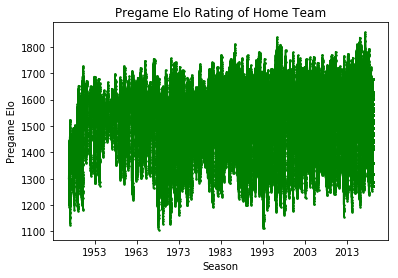

In [17]:
plt.plot(nba_data.date, nba_data.elo1_pre, color='green', marker='o', markersize=1.5, linestyle='solid');
plt.xlabel('Season')
plt.ylabel('Pregame Elo')
plt.title('Pregame Elo Rating of Home Team');


In [18]:
# Moving average of Home Team pre-game Elo rating
nba_rolling_elo2pre = nba_data.elo2_pre.rolling(window=2).mean()
nba_rolling_elo2pre

0                NaN
1        1303.361650
2        1303.361650
3        1300.000000
4        1300.000000
5        1296.638350
6        1306.828900
7        1315.016600
8        1307.171450
9        1291.318200
10       1297.014800
11       1306.577600
12       1284.266800
13       1272.370500
14       1305.511700
15       1313.456950
16       1288.791500
17       1311.512550
18       1324.931700
19       1316.283250
20       1296.295500
21       1291.249850
22       1313.927050
23       1295.258600
24       1291.664850
25       1304.099500
26       1305.695500
27       1297.097150
28       1276.461050
29       1298.233400
            ...     
68294    1404.760818
68295    1370.574560
68296    1436.007813
68297    1359.366284
68298    1390.357957
68299    1533.947215
68300    1580.265067
68301    1581.647751
68302    1517.761243
68303    1496.750735
68304    1569.382319
68305    1601.535531
68306    1604.946380
68307    1652.690337
68308    1519.621202
68309    1315.762599
68310    1436

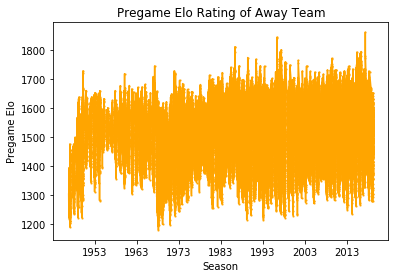

In [41]:
#plt.plot(nba_data.date, nba_data.elo1_pre, color='green', marker='o', markersize=1.5, linestyle='solid', alpha=.6);
plt.plot(nba_data.date, nba_rolling_elo2pre, color='orange', marker='x', markersize=1.5, linestyle='solid');
plt.xlabel('Season')
plt.ylabel('Pregame Elo')
plt.title('Pregame Elo Rating of Away Team');

In [0]:
# Moving average of Away Team pre-game Elo rating
nba_rolling_elo2pre = nba_data.elo2_pre.rolling(window=2).mean()
nba_rolling_elo2pre

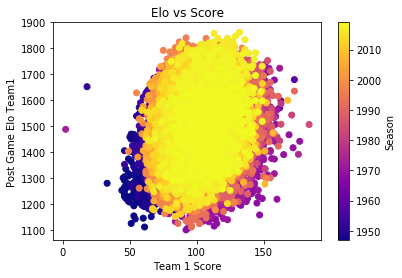

In [26]:
# make a scatterplot
#sns.lmplot(x='score1', y='elo1_post', c='season', cmap='plasma', data=nba_data);
plt.scatter(nba_data['score1'], nba_data['elo1_post'], c=nba_data['season'], cmap='plasma')
plt.xlabel('Team 1 Score')
plt.ylabel('Post Game Elo Team1')
plt.title('Elo vs Score')
plt.colorbar().set_label('Season')

In [0]:
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to reduce the dot size', loc='left')

##2018 Season Only

In [28]:
# Work with 2017-2018 values first
nba_2018 = nba_data.iloc[65783:67094]
print(nba_2018.shape) # Shows 1311 total games 

(1311, 24)


In [67]:
nba_2018.describe()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo1_post,carm-elo2_post,carm-elo_prob1,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2
count,1311.0,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,0.0,0.0,0.0,0.0,1311.000000,1311.000000
mean,2018.0,0.002288,1513.682754,1510.380481,0.626229,0.373771,1512.453519,1511.609716,1514.359148,1510.653706,1513.019929,1511.992926,0.629897,0.370103,NaN,NaN,NaN,NaN,107.402746,105.036613
std,0.0,0.047800,103.347627,102.316759,0.169970,0.169970,104.032593,102.486433,111.614533,110.837548,112.080616,110.871314,0.184456,0.184456,NaN,NaN,NaN,NaN,11.785142,12.181585
min,2018.0,0.000000,1239.700051,1234.893462,0.130274,0.023170,1234.893462,1241.054785,1237.320796,1231.264173,1231.264173,1238.607083,0.138616,0.020955,NaN,NaN,NaN,NaN,69.000000,69.000000
25%,2018.0,0.000000,1434.647434,1434.352060,0.510840,0.247216,1433.860534,1434.201674,1425.807329,1429.520428,1426.422943,1429.335433,0.494722,0.222455,NaN,NaN,NaN,NaN,99.000000,97.000000
50%,2018.0,0.000000,1520.010593,1518.426493,0.645209,0.354791,1519.319437,1519.295523,1522.272959,1518.925182,1521.420664,1518.419997,0.656232,0.343768,NaN,NaN,NaN,NaN,107.000000,105.000000
75%,2018.0,0.000000,1576.995591,1572.551823,0.752784,0.489160,1575.915869,1575.338562,1585.334975,1583.664565,1584.255087,1584.698902,0.777545,0.505278,NaN,NaN,NaN,NaN,115.000000,113.000000
max,2018.0,1.000000,1792.149932,1792.273162,0.976830,0.869726,1792.273162,1785.562518,1808.969488,1809.079898,1809.079898,1802.576381,0.979045,0.861384,NaN,NaN,NaN,NaN,149.000000,148.000000


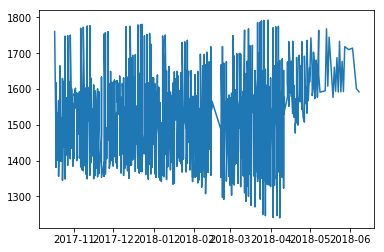

In [30]:
plt.plot('date', 'elo1_pre', data=nba_2018, markerfacecolor='blue')
plt.show()

In [0]:
#help(sns.lmplot)

In [1]:
# make a scatterplot
sns.lmplot(x='score1', y='elo1_post', data=nba_data, line_kws={'color': 'red'});
ax = plt.gca()
ax.set_title("Home Team Elo vs Score")

sns.lmplot(x='score2', y='elo2_post', data=nba_2018, line_kws={'color': 'red'},
           scatter_kws={'color':'green'});
ax = plt.gca()
ax.set_title("Away Team Elo vs Score")

sns.lmplot(x='elo_win', y='home_elo', data=nba_2018, line_kws={'color': 'red'},
           scatter_kws={'color':'skyblue'});
ax = plt.gca()
ax.set_title("Away Team Elo vs Score")

sns.lmplot(x='score1', y='score2', data=nba_2018, line_kws={'color': 'red'},
           scatter_kws={'color':'orange'});
ax = plt.gca()
ax.set_title("Home Team Score vs Away Team Score")

sns.lmplot(x='elo1_pre', y='elo2_post',  data=nba_2018,
           line_kws={'color': 'red'}, scatter_kws={'color':'blueviolet'});
ax = plt.gca()
ax.set_title("Home Team Pregame Elo vs Away Pregame Elo")

sns.lmplot(x='score2', y='elo1_post', data=nba_2018, line_kws={'color': 'red'});
ax = plt.gca()
ax.set_title("Away Team Score vs Home Team Elo");

NameError: ignored

In [0]:
help(sns.lmplot)

In [0]:
nba_2018.plot.hist(x='score1');

In [22]:
nba_data.dtypes

date              datetime64[ns]
season                     int64
neutral                    int64
playoff                   object
team1                     object
team2                     object
elo1_pre                 float64
elo2_pre                 float64
elo_prob1                float64
elo_prob2                float64
elo1_post                float64
elo2_post                float64
carm-elo1_pre            float64
carm-elo2_pre            float64
carm-elo1_post           float64
carm-elo2_post           float64
carm-elo_prob1           float64
carm-elo_prob2           float64
carmelo1_pre             float64
carmelo2_pre             float64
carmelo_prob1            float64
carmelo_prob2            float64
score1                   float64
score2                   float64
dtype: object

In [42]:
nba_2018.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo1_post,carm-elo2_post,carm-elo_prob1,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2
65783,2017-10-17,2018,0,NaN,GSW,HOU,1760.609663,1574.467471,0.838508,0.161492,...,1753.884111,1682.115889,0.747495,0.252505,NaN,NaN,NaN,NaN,121.0,122.0
65784,2017-10-18,2018,0,NaN,DET,CHO,1456.654984,1473.216401,0.617821,0.382179,...,1439.104231,1529.895769,0.476536,0.523464,NaN,NaN,NaN,NaN,102.0,90.0
65785,2017-10-18,2018,0,NaN,WAS,PHI,1565.684248,1379.575952,0.838481,0.161519,...,1552.479069,1474.520931,0.718121,0.281879,NaN,NaN,NaN,NaN,120.0,115.0
65786,2017-10-18,2018,0,NaN,ORL,MIA,1390.229357,1552.809706,0.410901,0.589099,...,1464.397752,1476.602248,0.598634,0.401366,NaN,NaN,NaN,NaN,116.0,109.0
65787,2017-10-18,2018,0,NaN,IND,BRK,1502.884837,1405.034022,0.757481,0.242519,...,1411.729285,1375.270715,0.671978,0.328022,NaN,NaN,NaN,NaN,140.0,131.0


####3. Explore Parse/Clean Data
  * Determine what data is necessary and which is auxiliary
  * Clean data - deal with empty cells/NaN
    * need isna().sum() to analyze where NaNs are located
   

In [0]:
nba_data.isna().sum()

In [0]:
# Create a function to add highest elo win yes(1) or no(0)
def f(row):
    if (row['score1'] > row['score2']) & (row['elo1_pre'] > row['elo2_pre']):
        val = 1
    elif (row['score2'] > row['score1']) & (row['elo2_pre'] > row['elo1_pre']):
        val = 1
    else:
        val = 0
    return val

In [0]:
# Create a function to check if home team won
def h(row):
    if (row['score1'] > row['score2']):
        val = 1
    else:
        val = 0
    return val

In [0]:
# Create a function to check if home and higher elo team won
def j(row):
    if (row['score1'] > row['score2']) & (row['elo1_pre'] > row['elo2_pre']):
        val = 1
    else:
        val = 0
    return val

In [0]:
nba_data['elo_win'] = nba_data.apply(f, axis=1)

In [0]:
nba_data['home_win'] = nba_data.apply(h, axis=1)

In [0]:
nba_data['home_elo'] = nba_data.apply(j, axis=1)

In [54]:
print(nba_data.elo_win.value_counts())
print(nba_data.home_win.value_counts())
print(nba_data.home_elo.value_counts())


1    43409
0    24915
Name: elo_win, dtype: int64
1    41881
0    26443
Name: home_win, dtype: int64
0    42559
1    25765
Name: home_elo, dtype: int64


In [45]:
nba_data.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo1_post,carm-elo2_post,carm-elo_prob1,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,68.0
1,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,47.0
2,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,53.0
3,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,51.0
4,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,50.0


In [57]:
print(nba_data[nba_data['season'] == 2018]['elo1_pre'].value_counts())
print(nba_data[nba_data['season'] == 2018]['elo_win'].value_counts())
print(nba_data[nba_data['season'] == 2018]['home_win'].value_counts())
print(nba_data[nba_data['season'] == 2018]['home_elo'].value_counts())

1406.365916    1
1494.630174    1
1395.610909    1
1358.495443    1
1560.584747    1
1520.511438    1
1517.374202    1
1336.518226    1
1602.395707    1
1583.923506    1
1386.305606    1
1629.298340    1
1367.641352    1
1733.184472    1
1498.629363    1
1561.526440    1
1329.657010    1
1349.693141    1
1403.935966    1
1401.745121    1
1578.686560    1
1506.185440    1
1432.694238    1
1677.914949    1
1720.939663    1
1552.369107    1
1367.866075    1
1546.064438    1
1608.741393    1
1441.319759    1
              ..
1567.824389    1
1487.651985    1
1572.182498    1
1633.257508    1
1406.385367    1
1400.554315    1
1432.881640    1
1374.593715    1
1483.234758    1
1350.411846    1
1561.754964    1
1525.917799    1
1456.028414    1
1469.781337    1
1379.667233    1
1527.326823    1
1532.348316    1
1614.263041    1
1450.063725    1
1407.469925    1
1402.052242    1
1524.063170    1
1645.601496    1
1554.655993    1
1577.421411    1
1629.756144    1
1542.447366    1
1588.350766   

In [0]:
#nba_data

####4. Define essential data, Group data


In [0]:
nba_years = nba_data.groupby

####5. Data Viz

In [0]:
#see above


####6. Build further models/algorithms

####7. Feedback loop / Iterate